# Import libraries and data

In [62]:
# import libraries 
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

from Bio import SeqIO
from utils import derive_global_features, get_uniprot, get_value, keep_first_uniprot, protein_analysis
from matplotlib_venn import venn2

In [63]:
data_path = os.getcwd() + "/Datasets/"

## Curated CSF data set

In [64]:
csf = pd.read_csv(data_path + "CSF/csf.csv")

## Human proteome

In [65]:
hp = pd.read_csv(data_path + "Uniprot/Human_proteome_Uniprot_seq.tab", sep="\t", header=0, names=["Uniprot", "Sequence"])
# drop entries without sequence (obsolete)
hp.dropna(subset=["Sequence"], inplace=True) # none dropped
# drop entries with non-standard amino acids
hp = hp[hp["Sequence"].str.contains("B|U|X") == False] # 25 entries dropped

## Higginbotham et al. 2020 Uniprot sequences (brain & CSF)

In [66]:
def get_uniprot_Higginbotham(string):
    _, uniprot = string.split("|")
    
    if "-" in uniprot:
        uniprot, _ = uniprot.split("-")

    return uniprot

In [67]:
# import protein lists
Higginbotham2020_brain = pd.read_csv(data_path + "/Biomarker_discovery/Higginbotham2020_protein_list_brain.txt", header=None, 
    names=["Uniprot"])
Higginbotham2020_CSF = pd.read_csv(data_path + "/Biomarker_discovery/Higginbotham2020_protein_list_CSF.txt", 
    header=None, names=["Uniprot"])

In [68]:
# retrieve (parent) Uniprot
Higginbotham2020_brain["Uniprot"] = Higginbotham2020_brain["Uniprot"].apply(get_uniprot_Higginbotham)
Higginbotham2020_CSF["Uniprot"] = Higginbotham2020_CSF["Uniprot"].apply(get_uniprot_Higginbotham)

In [69]:
# combine brain and CSF datasets and remove duplicates
Higginbotham2020 = pd.concat([Higginbotham2020_brain, Higginbotham2020_CSF]).drop_duplicates(["Uniprot"])
print("Number of proteins in dataset:", len(Higginbotham2020))

Number of proteins in dataset: 8941


In [70]:
# save cleaned Uniprot list
with open(data_path + "Biomarker_discovery/Higginbotham2020_protein_list_clean.txt", "w") as f:
    for item in Higginbotham2020["Uniprot"]:
        f.write("%s\n" % item)

In [71]:
df = pd.read_csv(data_path + "Biomarker_discovery/Higginbotham2020_Uniprot_seq.tab", sep="\t", header=0, 
    names=["Uniprot", "Sequence"])
print("Number of proteins in dataset with associated Uniprot ID:", len(df))
# drop entries without sequence (obsolete)
df.dropna(subset=["Sequence"], inplace=True) # 158 dropped
# drop entries with non-standard amino acids
df = df[df["Sequence"].str.contains("B|U|X") == False] # 123 entries dropped
print("Number of proteins in dataset with associated Uniprot ID and sequence:", len(df))

Number of proteins in dataset with associated Uniprot ID: 8881
Number of proteins in dataset with associated Uniprot ID and sequence: 8600


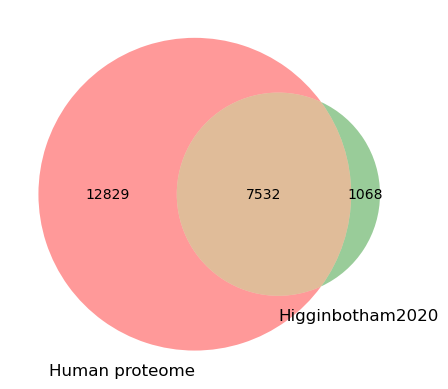

In [72]:
venn2([set(hp["Uniprot"]), set(df["Uniprot"])], ["Human proteome", "Higginbotham2020"])
plt.show()

In [73]:
new_proteins = set(df["Uniprot"]) - set(hp["Uniprot"])
print("Number of proteins in dataset that do not have features generated yet:", len(new_proteins))

Number of proteins in dataset that do not have features generated yet: 1068


# Feature generation

## Sequence length

In [74]:
df["Length"] = df["Sequence"].apply(len)

## Amino acid composition & attributes

In [75]:
# df = df.apply(protein_analysis, seq_col="Sequence", axis=1)

In [76]:
# save or load dataframe
# df.to_csv(data_path + "Features/df_features_PA_Higginbotham2020.csv", index=False)
df = pd.read_csv(data_path + "Features/df_features_PA_Higginbotham2020.csv") 
df[:5]

,Uniprot,Sequence,Length,Molecular weight,A,C,D,E,F,G,...,P,Q,R,S,T,V,W,Y,Isoelectric point,Instability index
0,Q9H4F8,MLPARCARLLTPHLLLVLVQLSPARGHRTTGPRFLISDRDPQCNLH...,434,48162.2393,0.052995,0.052995,0.062212,0.059908,0.023041,0.069124,...,0.078341,0.048387,0.066820,0.078341,0.066820,0.059908,0.009217,0.025346,8.586431,40.998157
1,P05067,MLPGLALLLLAAWTARALEVPTDGNAGLLAEPQIAMFCGRLNMHMN...,770,86942.3145,0.081818,0.023377,0.064935,0.119481,0.027273,0.049351,...,0.045455,0.046753,0.048052,0.045455,0.064935,0.084416,0.011688,0.025974,4.730448,40.691442
2,E9PLM6,MQHRGFLLLTLLALLALTSAVAKKKDKVKKGGPGSECAEWAWGPCT...,156,16925.5759,0.096154,0.064103,0.025641,0.044872,0.025641,0.121795,...,0.064103,0.044872,0.070513,0.032051,0.076923,0.044872,0.025641,0.012821,9.954773,14.569231
3,P05362,MAPSSPRPALPALLVLLGALFPGPGNAQTSVSPSKVILPRGGSVLV...,532,57824.5452,0.067669,0.026316,0.028195,0.063910,0.018797,0.067669,...,0.093985,0.058271,0.056391,0.062030,0.092105,0.090226,0.009398,0.022556,8.309282,36.466917
4,Q13501,MASLTVKAYLLGKEDAAREIRRFSFCCSPEPEAEAEAAAGPGPCER...,440,47686.6691,0.075000,0.031818,0.056818,0.093182,0.027273,0.090909,...,0.097727,0.027273,0.056818,0.111364,0.031818,0.043182,0.013636,0.020455,5.102061,59.370909


## Solubility

In [77]:
weights = {"A": 0.8356471476582918, "C": 0.5208088354857734, "U": 0.5208088354857734, "E": 0.9876987431418378,
           "D": 0.9079044671339564, "G": 0.7997168496420723, "F": 0.5849790194237692, "I": 0.6784124413866582,
           "H": 0.8947913996466419, "K": 0.9267104557513497, "L": 0.6554221515081433, "M": 0.6296623675420369, 
           "N": 0.8597433107431216, "Q": 0.789434648348208, "P": 0.8235328714705341, "S": 0.7440908318492778,
           "R": 0.7712466317693457, "T": 0.8096922697856334, "W": 0.6374678690957594, "V": 0.7357837119163659,
           "Y": 0.6112801822947587}

A = 81.0581
B = -62.7775

def sol(seq):
    SWI = np.mean(([weights[i] for i in seq]))
    sol = 1/(1 + np.exp(-(81.0581*SWI + -62.7775)))
    return sol

df["Solubility"] = df["Sequence"].apply(sol)

## Structural features (NetSurfP-2.0)

In [78]:
# nsp_features = pd.read_csv(data_path + "Features/NetSurfP_Higginbotham2020.zip")
# nsp_features["id"] = nsp_features["id"].apply(get_uniprot)
# nsp_features

In [79]:
# df = df.apply(derive_global_features, df_nsp=nsp_features, axis=1)

In [80]:
# save or load dataframe
# df.to_csv(data_path + "Features/df_features_PA_NSP_Higginbotham2020.csv", index=False)
df = pd.read_csv(data_path + "Features/df_features_PA_NSP_Higginbotham2020.csv") 
# make the order of columns match the training data columns
df = df[['Uniprot', 'Sequence', 'Length', 'Molecular weight', 'A', 'C', 'D', 'E',
       'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V',
       'W', 'Y', 'Isoelectric point', 'Instability index', 'Solubility',
       'Disorder_NSP', 'Helix_NSP', 'Coil_NSP', 'Sheet_NSP']]

## Signal peptide (SignalP-6.0)

In [81]:
signalp = pd.read_csv(data_path + "Features/SignalP_results_Higginbotham2020.txt", sep="\t", index_col=False, header=None, 
    skiprows=2, names=["Uniprot", "Prediction", "Likelihood-Other", "Likelihood-SP", "CS Position"])

# retrieve Uniprot ID
signalp["Uniprot"] = signalp["Uniprot"].apply(get_uniprot)
signalp_pos = signalp[signalp["Prediction"] == "SP"]
signalp_pos[:5]

,Uniprot,Prediction,Likelihood-Other,Likelihood-SP,CS Position
0,Q9H4F8,SP,0.000243,0.999729,CS pos: 26-27. Pr: 0.9760
1,P05067,SP,0.000225,0.999778,CS pos: 17-18. Pr: 0.9767
2,E9PLM6,SP,0.000233,0.999738,CS pos: 22-23. Pr: 0.5103
3,P05362,SP,0.000235,0.999742,CS pos: 27-28. Pr: 0.9777
5,Q92743,SP,0.000217,0.999739,CS pos: 22-23. Pr: 0.9788


In [82]:
df["Signal peptide"] = np.where(df["Uniprot"].isin(signalp_pos["Uniprot"]), 1, 0)

## Glycosylation prediction

### NetNglyc-1.0

In [83]:
#### TO DO ####
# move to utils

def netNglyc_filter(file, file_name):
    """
    """
    # open results file of netNglyc predictions
    results = open(file, "r")
    lines = results.readlines()
    
    # open new file to save filtered lines to
    filtered_results = open(data_path + "Features/" + file_name + ".txt", "w+")
    
    for line in lines:
        # save relevant lines to new file
        if line[:3] == "sp|":
            filtered_results.writelines(line)
    
    # close file
    filtered_results.close()
    
    return None
    
def split_netNglyc(df):
    """
    """
    string = df[0]
    
    # retrieve information from first column
    name, pos, seq = string.split()

    # retrieve Uniprot ID from description
    uniprot = get_uniprot(name)
    
    df["Uniprot"] = uniprot
    df["Position"] = pos
    df["Sequence"] = seq
    
    # drop old column
    df.drop(columns=[0], axis=1, inplace=True)
    
    # reorder columns
    df = df[["Uniprot", "Position", "Sequence", "Potential", "Jury agreement", "Result"]]
    
    return df

In [84]:
# # filter netNglyc results file
# netNglyc_filter(data_path + "Features/NetNglyc_results_Higginbotham2020.out", "NetNglyc_results_Higginbotham2020_filtered")

# # create clean dataframe of glycosylation prediction results
# netnglyc = pd.read_csv(data_path + "Features/NetNglyc_results_Higginbotham2020_filtered.txt", sep="\t", header=None) 
# netnglyc.dropna(axis=1, how="all", inplace=True)
# netnglyc.columns = [0, "Potential", "Jury agreement", "Result"]
# netnglyc = netnglyc.apply(split_netNglyc, axis=1)
# netnglyc

In [85]:
# save or load dataframe
# netnglyc.to_csv(data_path + "Features/NetNglyc_Higginbotham2020.csv", index=False)
netnglyc = pd.read_csv(data_path + "Features/NetNglyc_Higginbotham2020.csv") 

In [86]:
# filter for predicted glycosylation sites, "-" means predicted negative site
netnglyc_pos = netnglyc[netnglyc["Result"].str.contains("+++", regex=False)]
netnglyc_pos[:5]

,Uniprot,Position,Sequence,Potential,Jury agreement,Result
0,P30622,187,NLTK,0.7802,(9/9),+++
42,P41222,78,NLTS,0.8212,(9/9),+++
47,P49841,287,NYTE,0.7648,(9/9),+++
54,P31947,226,NLTL,0.7539,(9/9),+++
122,Q14571,461,NGTI,0.7656,(9/9),+++


In [87]:
glyc_sites = pd.DataFrame(netnglyc_pos["Uniprot"].value_counts(), index=None).reset_index()
glyc_sites.columns = ["Uniprot", "Glycosylation"]

In [88]:
# add glycosylation sites as a binary feature
df["NetNGlyc"] = np.where(df["Uniprot"].isin(set(glyc_sites["Uniprot"])), 1, 0)

### GlycoMine

Source: https://glycomine.erc.monash.edu/Lab/GlycoMine/

In [89]:
glycomine_n = pd.read_csv(data_path + "Features/GlycoMine_N_results.txt", sep=" ") 
glycomine_n_pos = glycomine_n[glycomine_n["Value"] > 0.5]

glycomine_o = pd.read_csv(data_path + "Features/GlycoMine_O_results.zip", sep=" ") # text file too big for GitHub
glycomine_o_pos = glycomine_o[glycomine_o["Value"] > 0.502]

glycomine_c = pd.read_csv(data_path + "Features/GlycoMine_C_results.txt", sep=" ") 
glycomine_c_pos = glycomine_c[glycomine_c["Value"] > 0.555]

In [90]:
df["GlycoMine_N"] = np.where(df["Uniprot"].isin(set(glycomine_n_pos["UniProtID"])), 1, 0)
df["GlycoMine_O"] = np.where(df["Uniprot"].isin(set(glycomine_o_pos["UniProtID"])), 1, 0)
df["GlycoMine_C"] = np.where(df["Uniprot"].isin(set(glycomine_c_pos["UniProtID"])), 1, 0)

## Subcellular location prediction (DeepLoc-1.0)

In [91]:
deeploc = pd.read_csv(data_path + "Features/DeepLoc_results_Higginbotham2020.txt", sep="\t")
deeploc.rename(columns={"ID":"Uniprot"}, inplace=True)

# retrieve Uniprot ID
deeploc["Uniprot"] = deeploc["Uniprot"].apply(get_uniprot)

In [92]:
deeploc["Location"].value_counts(dropna=False)

Cytoplasm                3220
Nucleus                  1547
Cell_membrane            1308
Mitochondrion             935
Extracellular             754
Endoplasmic_reticulum     502
Golgi_apparatus           240
Peroxisome                 89
Lysosome/Vacuole           70
Plastid                    58
Name: Location, dtype: int64

In [93]:
# keep same order of features
locs = ['Cytoplasm', 'Extracellular', 'Lysosome/Vacuole', 'Nucleus', 'Cell_membrane', 'Endoplasmic_reticulum', 
        'Mitochondrion', 'Golgi_apparatus', 'Peroxisome', 'Plastid']

# add subcellular locations as binary features
for i in locs:
    deeploc_subset = deeploc[deeploc["Location"] == i]
    df[i] = np.where(df["Uniprot"].isin(deeploc_subset["Uniprot"]), 1, 0)

## Transmembrane prediction (TMHMM-2.0)
https://services.healthtech.dtu.dk/service.php?TMHMM-2.0

In [94]:
tmhmm = pd.read_csv(data_path + "Features/TMHMM_results_Higginbotham2020.txt", header=None, sep="\t", 
    names=["Uniprot", "Length", "ExpAA", "First60ExpAA", "PredHel", "Topology"])

In [95]:
tmhmm["Uniprot"] = tmhmm["Uniprot"].apply(get_uniprot)
tmhmm["Length"] = tmhmm["Length"].apply(get_value)
tmhmm["ExpAA"] = tmhmm["ExpAA"].apply(get_value)
tmhmm["First60ExpAA"] = tmhmm["First60ExpAA"].apply(get_value)
tmhmm["PredHel"] = tmhmm["PredHel"].apply(get_value)

In [96]:
df = df.merge(tmhmm[["Uniprot", "ExpAA", "First60ExpAA", "PredHel"]], on="Uniprot", how="left")
df.fillna(0, inplace=True)
df["PredHel_binary"] = np.where(df["PredHel"] == 0, 0, 1)

## GPI-Anchor prediction (NetGPI-1.1)

In [97]:
# NetGPI results had to be split up as webserver only allows 5000 sequences at once
netgpi_A = pd.read_csv(data_path + "Features/NetGPI_results_Higginbotham2020_A.txt", sep="\t", header=1,
    names=["Uniprot", "Length", "Result", "Omega-site", "Likelihood", "Amino acid"]) 
netgpi_B = pd.read_csv(data_path + "Features/NetGPI_results_Higginbotham2020_B.txt", sep="\t", header=1,
    names=["Uniprot", "Length", "Result", "Omega-site", "Likelihood", "Amino acid"]) 

In [98]:
# combine results into one dataframe
netgpi = pd.concat([netgpi_A, netgpi_B], axis=0)
netgpi["Uniprot"] = netgpi["Uniprot"].apply(get_uniprot)

# keep only proteins predicted to have GPI anchor
netgpi_pos = netgpi[netgpi["Result"] == "GPI-Anchored"]

In [99]:
df["GPI-anchor"] = np.where(df["Uniprot"].isin(netgpi_pos["Uniprot"]), 1, 0)

##  Domains

In [100]:
def read_uniprot_list(file):
    file = open(data_path + "Features/" + file, "r")
    lines = file.readlines()
    uniprots = []
    
    for line in lines:
        line_strip = line.strip()
        uniprots.append(line_strip)
        
    return uniprots  

### EGF1 (PS00022)

In [101]:
PS00022 = read_uniprot_list("PS00022_Higginbotham2020.txt")
df["PS00022"] = np.where(df["Uniprot"].isin(PS00022), 1, 0)
df["PS00022"].value_counts()

0    8476
1     124
Name: PS00022, dtype: int64

### EGF2 (PS01186)

In [102]:
PS01186 = read_uniprot_list("PS01186_Higginbotham2020.txt")
df["PS01186"] = np.where(df["Uniprot"].isin(PS01186), 1, 0)
df["PS01186"].value_counts()

0    8440
1     160
Name: PS01186, dtype: int64

### Cadherin-1 (PS00232)

In [103]:
PS00232 = read_uniprot_list("PS00232_Higginbotham2020.txt")
df["PS00232"] = np.where(df["Uniprot"].isin(PS00232), 1, 0)
df["PS00232"].value_counts()

0    8536
1      64
Name: PS00232, dtype: int64

### G-protein receptor F1 (PS00237)

In [104]:
PS00237 = read_uniprot_list("PS00237_Higginbotham2020.txt")
df["PS00237"] = np.where(df["Uniprot"].isin(PS00237), 1, 0)
df["PS00237"].value_counts()

0    8577
1      23
Name: PS00237, dtype: int64

### Zinc Finger C2H2 (PS00028)

In [105]:
PS00028 = read_uniprot_list("PS00028_Higginbotham2020.txt")
df["PS00028"] = np.where(df["Uniprot"].isin(PS00028), 1, 0)
df["PS00028"].value_counts()

0    8555
1      45
Name: PS00028, dtype: int64

### Homeobox (PS00027)

In [106]:
PS00027 = read_uniprot_list("PS00027_Higginbotham2020.txt")
df["PS00027"] = np.where(df["Uniprot"].isin(PS00027), 1, 0)
df["PS00027"].value_counts()

0    8598
1       2
Name: PS00027, dtype: int64

## CSF presence (Label)

In [107]:
df["CSF"] = np.where(df["Uniprot"].isin(csf["Uniprot"]), 1, -1)
df[:5]

,Uniprot,Sequence,Length,Molecular weight,A,C,D,E,F,G,...,PredHel,PredHel_binary,GPI-anchor,PS00022,PS01186,PS00232,PS00237,PS00028,PS00027,CSF
0,Q9H4F8,MLPARCARLLTPHLLLVLVQLSPARGHRTTGPRFLISDRDPQCNLH...,434,48162.2393,0.052995,0.052995,0.062212,0.059908,0.023041,0.069124,...,0.0,0,0,0,0,0,0,0,0,1
1,P05067,MLPGLALLLLAAWTARALEVPTDGNAGLLAEPQIAMFCGRLNMHMN...,770,86942.3145,0.081818,0.023377,0.064935,0.119481,0.027273,0.049351,...,1.0,1,0,0,0,0,0,0,0,1
2,E9PLM6,MQHRGFLLLTLLALLALTSAVAKKKDKVKKGGPGSECAEWAWGPCT...,156,16925.5759,0.096154,0.064103,0.025641,0.044872,0.025641,0.121795,...,1.0,1,0,0,0,0,0,0,0,-1
3,P05362,MAPSSPRPALPALLVLLGALFPGPGNAQTSVSPSKVILPRGGSVLV...,532,57824.5452,0.067669,0.026316,0.028195,0.063910,0.018797,0.067669,...,1.0,1,0,0,0,0,0,0,0,1
4,Q13501,MASLTVKAYLLGKEDAAREIRRFSFCCSPEPEAEAEAAAGPGPCER...,440,47686.6691,0.075000,0.031818,0.056818,0.093182,0.027273,0.090909,...,0.0,0,0,0,0,0,0,0,0,1


# Save feature dataframes

In [108]:
# save entire feature data set
df.to_csv(data_path + "Features/df_features_Higginbotham2020.csv", index=False)
print("Number of proteins:", len(df))

Number of proteins: 8600
